In [ ]:
# # Parameters
# h5ad_subset = "/data/work/test1/test2/cotton_K2.hr.rds.rh.h5ad"
# cluster_key = "RNA_snn_res.0.5"
# h5ad_all = "/data/users/yangdong/yangdong_faff775391984da0a355d4bd70217714/online/cotton/output/dataget/K2/cotton_K2.h5ad"
# cluster_key_all = "leiden_res_0.50"


# CytoTRACE-based analysis

Construct CytoTRACE score for embryoid body development and analyse data with the _CytoTRACEKernel_.
[Reference](https://github.com/theislab/cellrank2_reproducibility/tree/main/notebooks/cytotrace_kernel/embryoid_bodyhttps://github.com/theislab/cellrank2_reproducibility/tree/main/notebooks/cytotrace_kernel/embryoid_body)
**Log:** 250826

## Library imports

In [2]:
import sys
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import cellrank as cr
import scanpy as sc
import scvelo as scv

# import sys, os
# sys.path.insert(0, '/data/users/yangdong/yangdong_faff775391984da0a355d4bd70217714/online/cotton/cellrank2')   # 你的 cr2 绝对路径
# from cr2 import get_state_purity, plot_state_purity, running_in_notebook
def running_in_notebook() -> bool:
    """Evaluate if code is running in an IPython notebook."""
    try:
        from IPython import get_ipython

        if "IPKernelApp" not in get_ipython().config:
            return False
    except ImportError:
        return False
    except AttributeError:
        return False
    return True

# sys.path.extend(["../../../", "."])
# from paths import DATA_DIR, FIG_DIR  # isort: skip  # noqa: E402

## General settings

In [3]:
sc.settings.verbosity = 2
scv.settings.verbosity = 3

scv.settings.set_figure_params("scvelo", dpi_save=400, dpi=80, transparent=True, fontsize=20, color_map="viridis")

SAVE_FIGURES = False
FIG_DIR = 'cytotrace'

from pathlib import Path

FIG_DIR = Path(FIG_DIR)     # 把原来的字符串改成 Path

if SAVE_FIGURES:
    (FIG_DIR).mkdir(parents=True, exist_ok=True)

FIGURE_FORMAT = "pdf"

## Data loading

In [4]:
adata = sc.read_h5ad(h5ad_subset)
prefix = os.path.splitext(os.path.basename(h5ad_subset))[0]
adata

AnnData object with n_obs × n_vars = 537 × 27363
    obs: 'nCount_RNA', 'nFeature_RNA', 'new_index', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_genes', 'doublet_score', 'leiden', 'leiden_res_0.20', 'leiden_res_0.80', 'leiden_res_1.00', 'leiden_res_1.30', 'leiden_res_1.60', 'leiden_res_2.00', 'RNA_snn_res.0.5', 'seurat_clusters', 'sample'
    var: 'new_index', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    uns: 'hvg', 'log1p', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap', 'X_xpca_', 'X_xumap_'
    layers: 'counts'
 

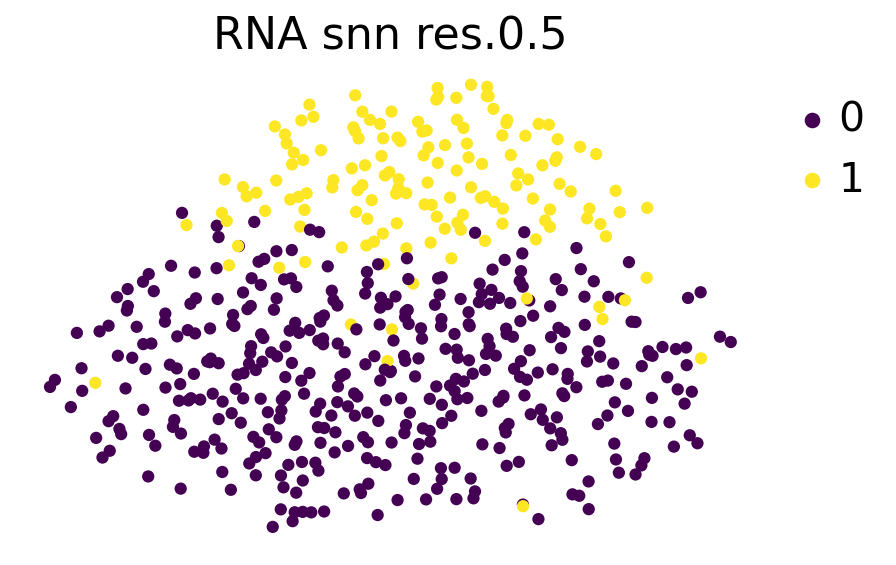

In [5]:
if running_in_notebook():
    scv.pl.scatter(adata, basis="umap", c=cluster_key, palette="viridis")

if SAVE_FIGURES:
    fig, ax = plt.subplots(figsize=(6, 4))
    scv.pl.scatter(adata, basis="umap", c=cluster_key, title="", legend_loc=False, palette="viridis", ax=ax)
    fig.savefig(
        FIG_DIR / f"umap_colored_by_stage.{FIGURE_FORMAT}",
        format=FIGURE_FORMAT,
        transparent=True,
        bbox_inches="tight",
    )

## Data preprocessing

In [6]:
adata.layers["spliced"] = adata.X
adata.layers["unspliced"] = adata.X

# scv.pp.moments(adata, n_pcs=None, n_neighbors=None)
scv.pp.moments(adata)

computing neighbors


    finished (0:00:10) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities


    finished (0:00:02) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


## CellRank

### Kernel

In [7]:
ctk = cr.kernels.CytoTRACEKernel(adata)
ctk.compute_cytotrace()

CytoTRACEKernel[n=537]

/opt/software/miniconda3/envs/cellrank2/lib/python3.12/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/opt/software/miniconda3/envs/cellrank2/lib/python3.12/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/opt/software/miniconda3/envs/cellrank2/lib/python3.12/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/opt/software/miniconda3/envs/cellrank2/lib

/opt/software/miniconda3/envs/cellrank2/lib/python3.12/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/opt/software/miniconda3/envs/cellrank2/lib/python3.12/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/opt/software/miniconda3/envs/cellrank2/lib/python3.12/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/opt/software/miniconda3/envs/cellrank2/lib

/opt/software/miniconda3/envs/cellrank2/lib/python3.12/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])


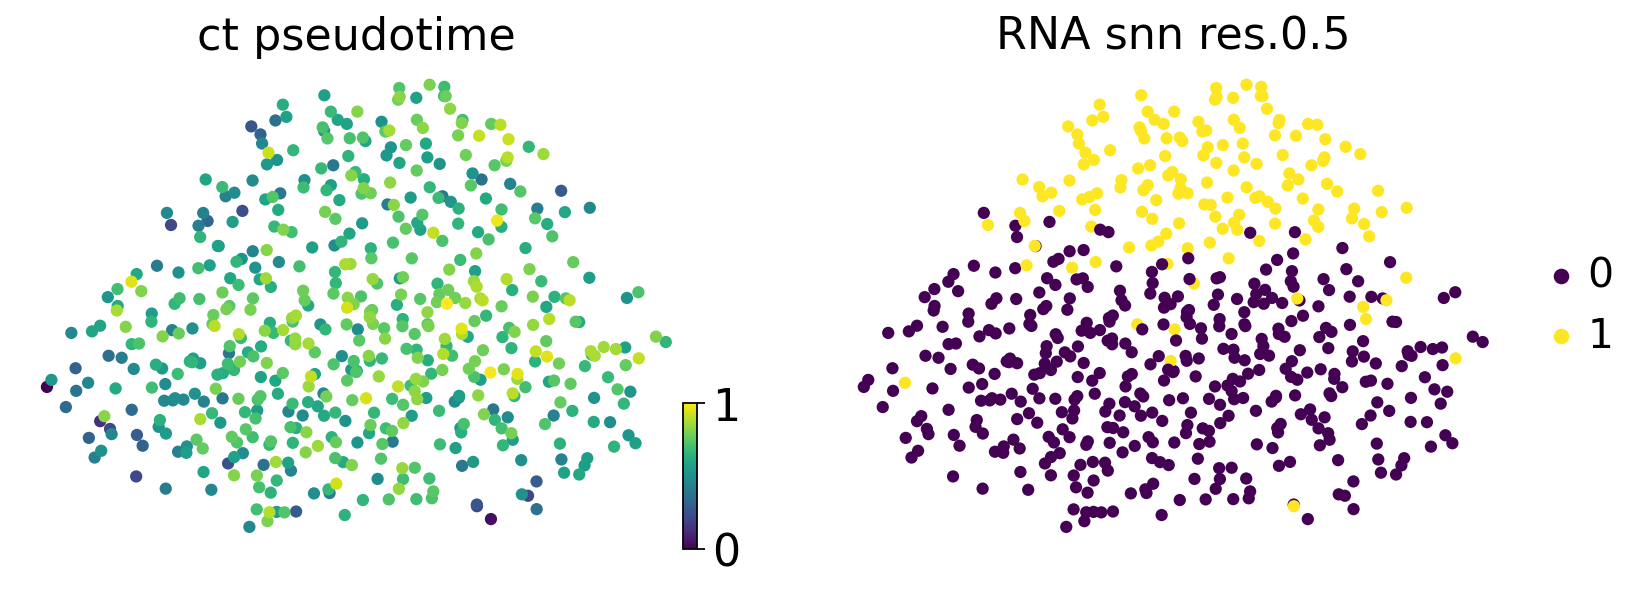

In [8]:
if running_in_notebook():
    scv.pl.scatter(
        adata,
        c=["ct_pseudotime", cluster_key],
        basis="umap",
        legend_loc="right",
        color_map="viridis",
    )

if SAVE_FIGURES:
    fig, ax = plt.subplots(figsize=(6, 4))
    scv.pl.scatter(
        adata, basis="umap", c="ct_pseudotime", title="", colorbar=False, color_map="gnuplot2", show=False, ax=ax
    )

    fig.savefig(
        FIG_DIR / "umap_colored_by_ct_pseudotime.{FIGURE_FORMAT}",
        format=FIGURE_FORMAT,
        transparent=True,
        bbox_inches="tight",
    )

/tmp/ipykernel_984/3640300729.py:6: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.violinplot(


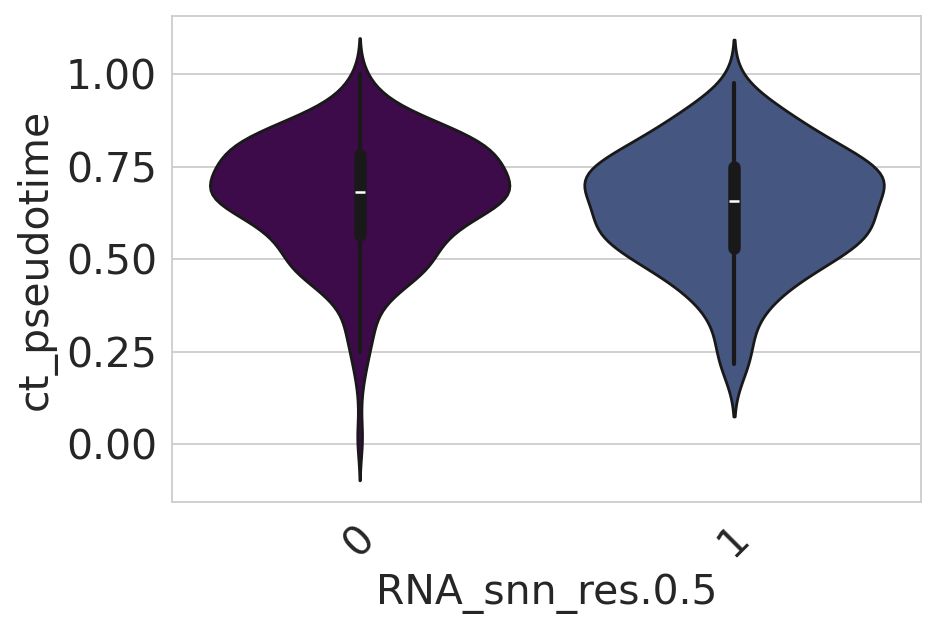

In [9]:
df = adata.obs[["ct_pseudotime", cluster_key]].copy()

if running_in_notebook():
    sns.set_style(style="whitegrid")
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.violinplot(
        data=df,
        x=cluster_key,
        y="ct_pseudotime",
        scale="width",
        palette=["#440154", "#3b528b", "#21918c", "#5ec962", "#fde725"],
        ax=ax,
    )

    ax.tick_params(axis="x", rotation=45)
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
    plt.show()
    sns.reset_orig()

if SAVE_FIGURES:
    sns.set_style(style="whitegrid")
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.violinplot(
        data=df,
        x=cluster_key,
        y="ct_pseudotime",
        scale="width",
        palette=["#440154", "#3b528b", "#21918c", "#5ec962", "#fde725"],
        ax=ax,
    )
    ax.set(xlabel=None, xticklabels=[], ylabel=None, yticklabels=[])

    fig.savefig(
        FIG_DIR / f"cytotrace_vs_stage.{FIGURE_FORMAT}",
        format=FIGURE_FORMAT,
        transparent=True,
        bbox_inches="tight",
    )
    sns.reset_orig()

In [10]:
adata.write_h5ad(f"{prefix}_ct.h5ad",compression='gzip')

# See it in whole umap

In [11]:
adata2 = sc.read_h5ad(h5ad_all)
adata2

AnnData object with n_obs × n_vars = 11021 × 27363
    obs: 'sample', 'biosample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_genes', 'doublet_score', 'predicted_doublet', 'leiden', 'leiden_res_0.02', 'leiden_res_0.20', 'leiden_res_0.50', 'leiden_res_0.80', 'leiden_res_1.00', 'leiden_res_1.30', 'leiden_res_1.60', 'leiden_res_2.00'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'dendrogram_leiden_res_0.20', 'dendrogram_leiden_res_0.50', 'dendrogram_leiden_res_0.80', 'dendrogram_leiden_res_1.00', 'dendrogram_leiden_res_1.30', 'dendrogram_leiden_res_1.60', 'dendrogram_leiden_res_2.00', 'hvg', 'leiden', 

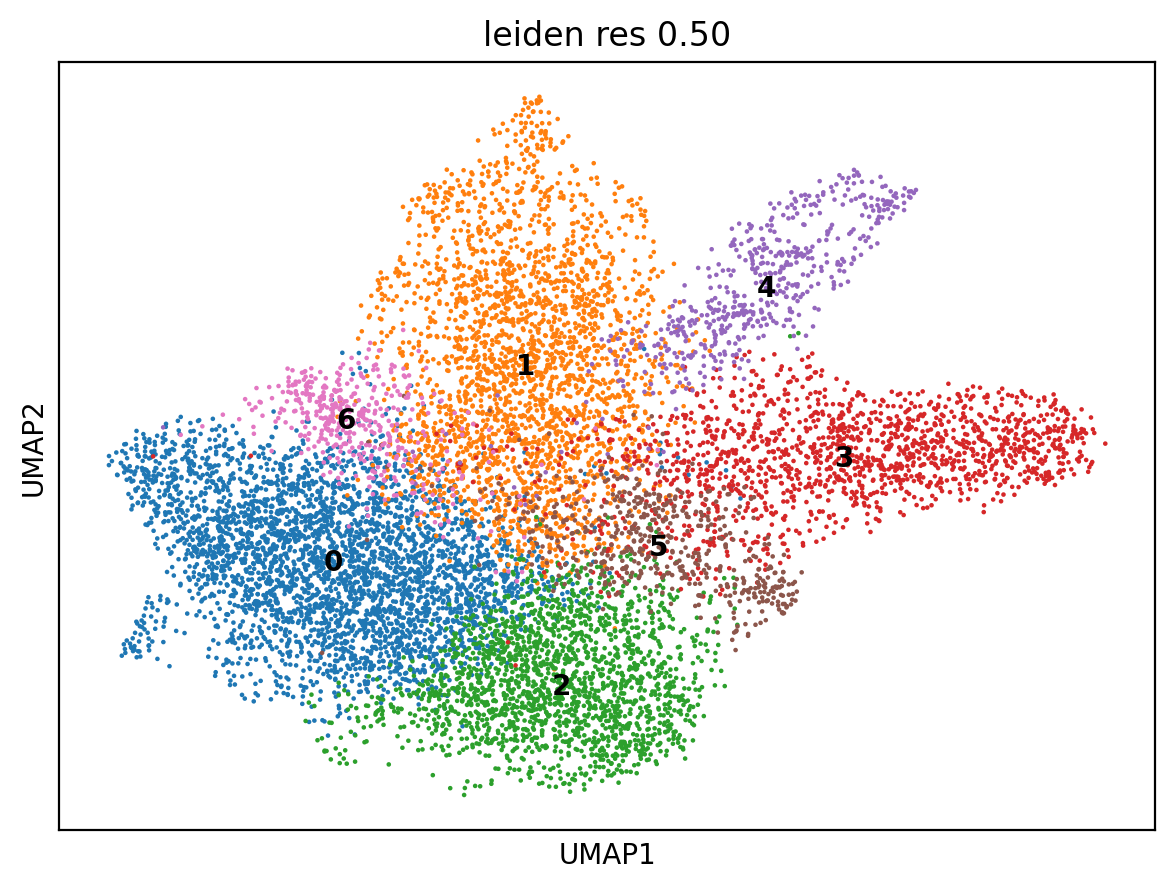

In [12]:
sc.pl.scatter(adata2, basis='umap', color=cluster_key_all, legend_loc='on data')

            sample  biosample  n_genes_by_counts  log1p_n_genes_by_counts  \
CELL2_N3_K2     K2  cotton_K2               2655                 7.884577   
CELL3_N2_K2     K2  cotton_K2               1644                 7.405496   
CELL5_N4_K2     K2  cotton_K2               1313                 7.180831   
CELL8_N2_K2     K2  cotton_K2               1008                 6.916715   
CELL9_N3_K2     K2  cotton_K2               2461                 7.808729   

             total_counts  log1p_total_counts  pct_counts_in_top_50_genes  \
CELL2_N3_K2        3891.0            8.266679                   14.006682   
CELL3_N2_K2        2169.0            7.682482                   13.047487   
CELL5_N4_K2        1635.0            7.400010                   12.660550   
CELL8_N2_K2        1284.0            7.158514                   14.641745   
CELL9_N3_K2        3634.0            8.198364                   14.914695   

             pct_counts_in_top_100_genes  pct_counts_in_top_200_genes  \
C

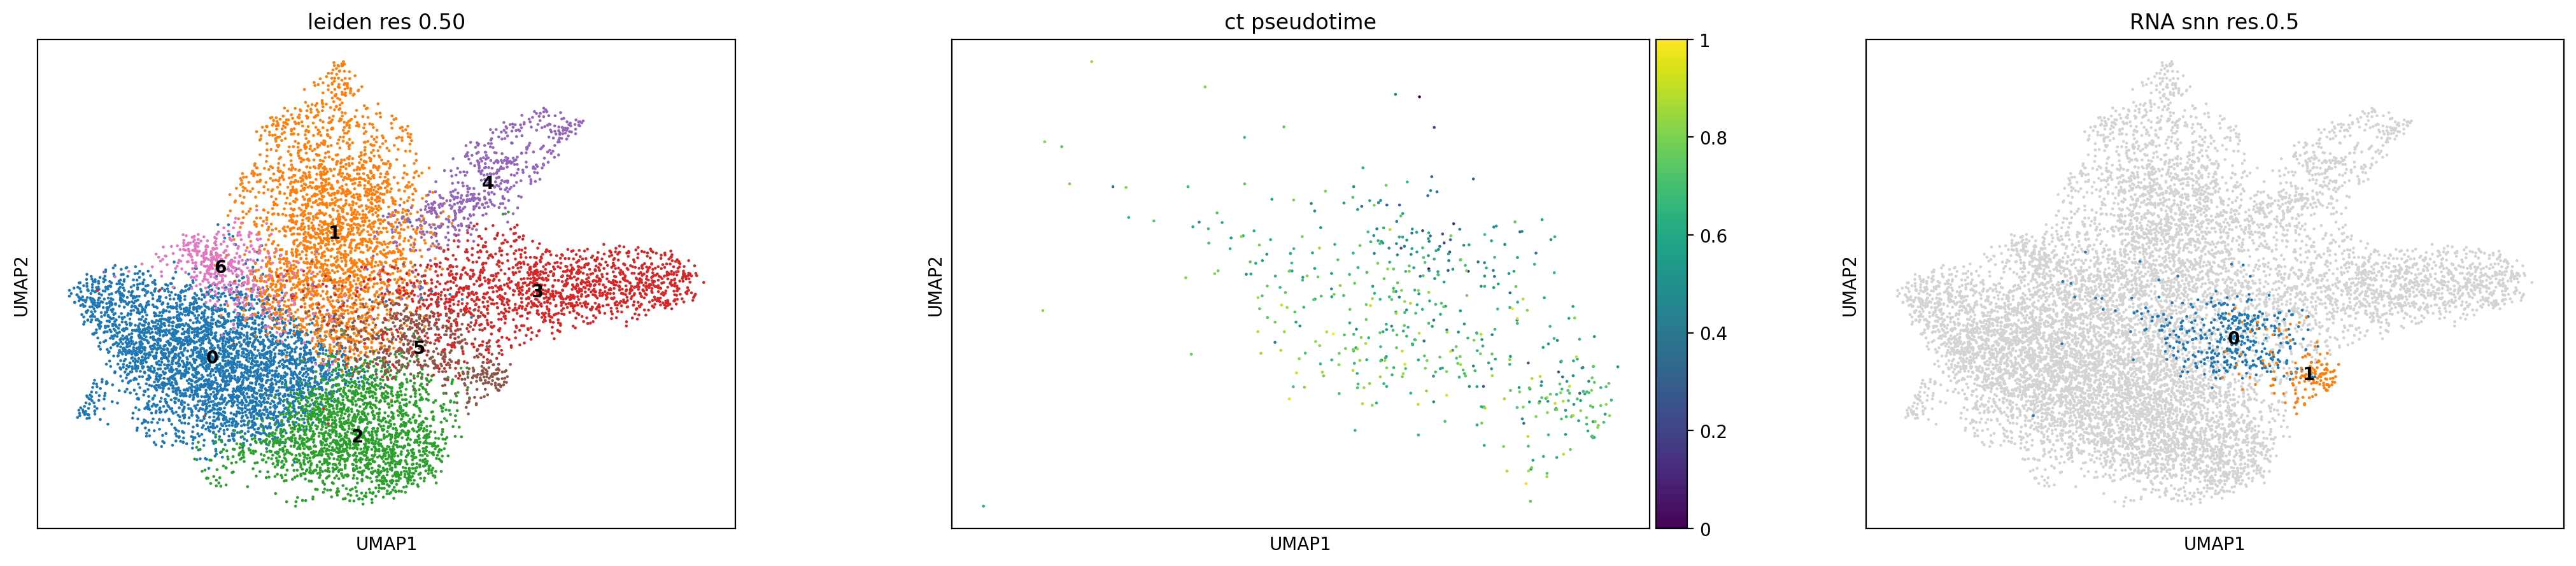

In [13]:
data = adata.obs
data = data[['ct_pseudotime', cluster_key]]

data.index = data.index.astype(str)
# 1) 建立全量 DataFrame，缺失填 NaN
full_df = data.reindex(adata2.obs.index)
# 2) 把列写回 adata2.obs
for col in full_df.columns:
    adata2.obs[col] = full_df[col]
# 3) （可选）确认
print(adata2.obs.head())
#sc.pl.scatter(adata2, basis="umap", color=["Ga12g00054", "Ga14g00277"], legend_loc='on data')
sc.pl.scatter(adata2, basis="umap", color=[cluster_key_all, "ct_pseudotime", cluster_key], legend_loc='on data')

# # 1. 新建一列，只把目标细胞设为 True
# cell_barcode = "CELL47239_N1_1"
# adata2.obs["highlight"] = adata2.obs_names == cell_barcode

# # 2. 画图
# sc.pl.scatter(
#     adata2,
#     basis="umap",
#     color="highlight",
#     legend_loc="on data",
#     save=f"_{prefix}_root_dpt_pseudotime.pdf"
# )

In [14]:
# ctk.compute_transition_matrix(threshold_scheme="soft", nu=0.5)

### Estimator

In [15]:
# estimator = cr.estimators.GPCCA(ctk)
# estimator.compute_schur(n_components=20)
# if running_in_notebook():
#     estimator.plot_spectrum(real_only=True)
#     plt.show()